In [1]:
# Import the pandas library for data handling
import pandas as pd

# Load the cleaned dataset (adjust the path as needed)
df = pd.read_csv("../shopping_behavior_cleaned.csv")

# Display the first 5 rows of the dataset
df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Season,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Frequency Value
0,1,55,Male,Blouse,Clothing,53,Winter,3.1,1,1,1,14,Bi-Weekly,4
1,2,19,Male,Sweater,Clothing,64,Winter,3.1,1,1,1,2,Bi-Weekly,4
2,3,50,Male,Jeans,Clothing,73,Spring,3.1,1,1,1,23,Weekly,5
3,4,21,Male,Sandals,Footwear,90,Spring,3.5,1,1,1,49,Weekly,5
4,5,45,Male,Blouse,Clothing,49,Spring,2.7,1,1,1,31,Annually,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Summer,4.2,0,0,0,32,Weekly,5
3896,3897,52,Female,Backpack,Accessories,49,Spring,4.5,0,0,0,41,Bi-Weekly,4
3897,3898,46,Female,Belt,Accessories,33,Spring,2.9,0,0,0,24,Quarterly,2
3898,3899,44,Female,Shoes,Footwear,77,Summer,3.8,0,0,0,24,Weekly,5


In [2]:
# Check the shape and column names of the dataset
df.shape, df.columns

((3900, 14),
 Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
        'Purchase Amount (USD)', 'Season', 'Review Rating',
        'Subscription Status', 'Discount Applied', 'Promo Code Used',
        'Previous Purchases', 'Frequency of Purchases', 'Frequency Value'],
       dtype='object'))

In [3]:
# Select features relevant to customer behavior for clustering
features = df[[
    'Age',
    'Gender',
    'Category',
    'Purchase Amount (USD)',
    'Season',
    'Review Rating',
    'Frequency Value',
    'Previous Purchases'
]]


In [4]:
# Perform one-hot encoding for categorical variables
features_encoded = pd.get_dummies(features, columns=['Gender', 'Category', 'Season'], drop_first=True)


In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features_encoded)


In [6]:
# Convert the scaled features back into a DataFrame for readability
import numpy as np

scaled_df = pd.DataFrame(scaled_features, columns=features_encoded.columns)

# Display the first few rows of the final dataset to be used for clustering
scaled_df.head()


,Age,Purchase Amount (USD),Review Rating,Frequency Value,Previous Purchases,Gender_Male,Category_Clothing,Category_Footwear,Category_Outerwear,Season_Spring,Season_Summer,Season_Winter
0,0.718913,-0.285629,-0.907584,0.788616,-0.785831,0.685994,1.115908,-0.425981,-0.301005,-0.586825,-0.569455,1.736801
1,-1.648629,0.178852,-0.907584,0.788616,-1.616552,0.685994,1.115908,-0.425981,-0.301005,-0.586825,-0.569455,1.736801
2,0.390088,0.558882,-0.907584,1.552931,-0.162789,0.685994,1.115908,-0.425981,-0.301005,1.704084,-0.569455,-0.575771
3,-1.517099,1.276716,-0.349027,1.552931,1.637107,0.685994,-0.896131,2.347520,-0.301005,1.704084,-0.569455,-0.575771
4,0.061263,-0.454531,-1.466141,-1.504328,0.391025,0.685994,1.115908,-0.425981,-0.301005,1.704084,-0.569455,-0.575771


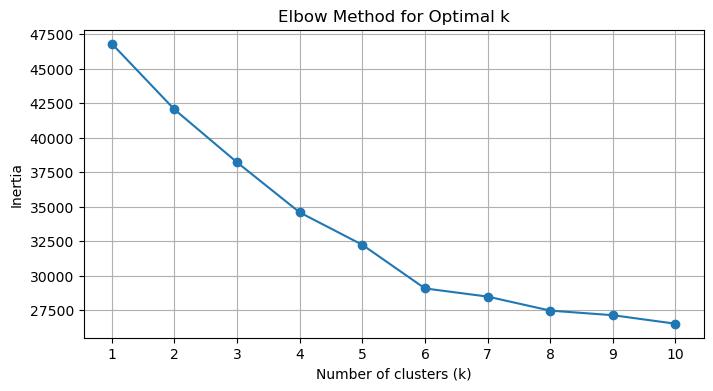

In [7]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store inertia values
inertia = []

# Try different values of k from 1 to 10
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [8]:
# Train the final KMeans model with optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df)

# Assign cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_


In [9]:
# Centroids in scaled space
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=features_encoded.columns)
print("Cluster centroids (scaled):")
display(centroids_scaled)

# Centroids in original units
centroids_original = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features_encoded.columns
)
print("Cluster centroids (original scale):")
display(centroids_original)

# Cluster sizes
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
display(cluster_sizes)

Cluster centroids (scaled):


,Age,Purchase Amount (USD),Review Rating,Frequency Value,Previous Purchases,Gender_Male,Category_Clothing,Category_Footwear,Category_Outerwear,Season_Spring,Season_Summer,Season_Winter
0,0.024592,0.020736,0.056836,0.023025,-0.008272,-0.026197,-0.896131,2.347520,-0.301005,0.036577,0.051720,-0.035270
1,-0.062474,0.038344,-0.016756,0.033461,0.035304,0.003768,0.304126,-0.425981,-0.301005,-0.586825,-0.569455,1.736801
2,0.017318,-0.021458,-0.006609,-0.016981,-0.037903,-0.012042,-0.896131,-0.425981,1.510599,-0.300462,-0.300297,-0.290268
3,0.023094,0.009914,0.009050,-0.001564,-0.002724,0.009504,0.603536,-0.425981,-0.301005,0.876488,-0.569455,-0.575771
4,-0.008795,-0.054209,-0.038717,-0.036207,0.008643,0.013101,0.244024,-0.425981,-0.301005,-0.586825,1.756067,-0.575771


Cluster centroids (original scale):


,Age,Purchase Amount (USD),Review Rating,Frequency Value,Previous Purchases,Gender_Male,Category_Clothing,Category_Footwear,Category_Outerwear,Season_Spring,Season_Summer,Season_Winter
0,44.442404,60.255426,3.790651,2.998331,25.232053,0.667780,-3.885781e-16,1.000000e+00,-2.359224e-16,2.721202e-01,2.671119e-01,2.337229e-01
1,43.118509,60.672437,3.737949,3.011984,25.861518,0.681758,5.965379e-01,8.326673e-17,-3.885781e-16,6.661338e-16,5.551115e-16,1.000000e+00
2,44.331790,59.256173,3.745216,2.945988,24.804012,0.674383,-2.220446e-16,-1.665335e-16,5.000000e-01,1.250000e-01,1.157407e-01,1.234568e-01
3,44.419628,59.999154,3.756430,2.966159,25.312183,0.684433,7.453469e-01,8.049117e-16,-4.163336e-17,6.387479e-01,-3.053113e-16,-2.220446e-16
4,43.934722,58.480556,3.722222,2.920833,25.476389,0.686111,5.666667e-01,0.000000e+00,-3.747003e-16,6.106227e-16,1.000000e+00,-9.992007e-16


Cluster sizes:


Cluster
0     599
1     751
2     648
3    1182
4     720
Name: count, dtype: int64

In [10]:
display(centroids_original)

,Age,Purchase Amount (USD),Review Rating,Frequency Value,Previous Purchases,Gender_Male,Category_Clothing,Category_Footwear,Category_Outerwear,Season_Spring,Season_Summer,Season_Winter
0,44.442404,60.255426,3.790651,2.998331,25.232053,0.667780,-3.885781e-16,1.000000e+00,-2.359224e-16,2.721202e-01,2.671119e-01,2.337229e-01
1,43.118509,60.672437,3.737949,3.011984,25.861518,0.681758,5.965379e-01,8.326673e-17,-3.885781e-16,6.661338e-16,5.551115e-16,1.000000e+00
2,44.331790,59.256173,3.745216,2.945988,24.804012,0.674383,-2.220446e-16,-1.665335e-16,5.000000e-01,1.250000e-01,1.157407e-01,1.234568e-01
3,44.419628,59.999154,3.756430,2.966159,25.312183,0.684433,7.453469e-01,8.049117e-16,-4.163336e-17,6.387479e-01,-3.053113e-16,-2.220446e-16
4,43.934722,58.480556,3.722222,2.920833,25.476389,0.686111,5.666667e-01,0.000000e+00,-3.747003e-16,6.106227e-16,1.000000e+00,-9.992007e-16


In [11]:
# Display average feature values per cluster
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Purchase Amount (USD)': 'mean',
    'Review Rating': 'mean',
    'Previous Purchases': 'mean',
    'Frequency Value': 'mean',
    'Subscription Status' : 'mean'
}).round(2)

# Display the cluster summary
cluster_summary


,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Frequency Value,Subscription Status
Cluster,,,,,,
0,44.44,60.26,3.79,25.23,3.00,0.29
1,43.12,60.67,3.74,25.86,3.01,0.26
2,44.33,59.26,3.75,24.80,2.95,0.28
3,44.42,60.00,3.76,25.31,2.97,0.26
4,43.93,58.48,3.72,25.48,2.92,0.27


In [12]:
# Export the data with cluster labels for reporting or visualization
df.to_csv("../clustered_customers.csv", index=False)


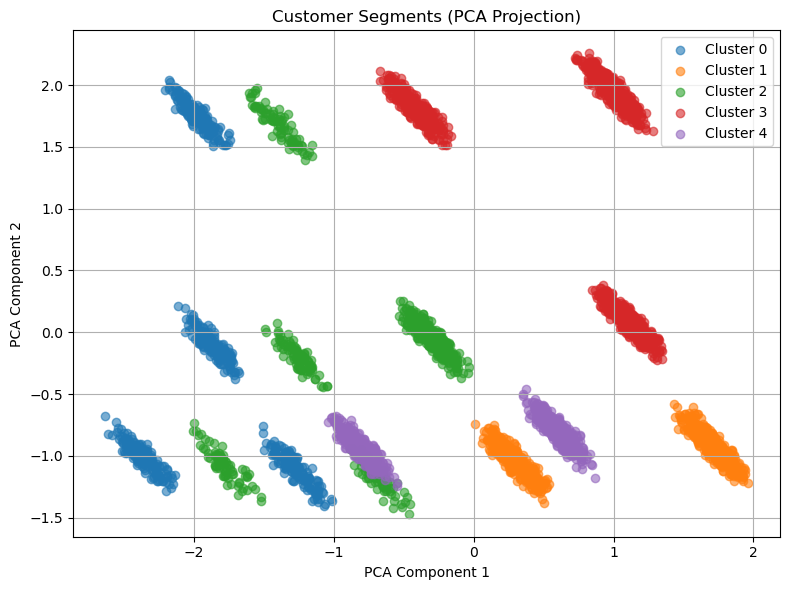

In [13]:
# Import PCA and matplotlib for visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df['Cluster'].unique()):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import silhouette_score
import csv

# Calculate silhouette score
score = silhouette_score(scaled_df, df['Cluster'])

# Save metrics to CSV
with open("../results/model_metrics.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Model", "Num_Clusters", "Inertia", "Silhouette_Score"])
    writer.writerow(["KMeans", 5, int(kmeans.inertia_), round(score, 2)])


In [15]:
# Average values per cluster
cluster_summary2 = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary2)


         Customer ID        Age  Purchase Amount (USD)  Review Rating  \
Cluster                                                                 
0        1959.759599  44.442404              60.255426       3.790651   
1        1937.452730  43.118509              60.672437       3.737949   
2        1941.603395  44.331790              59.256173       3.745216   
3        1963.800338  44.419628              59.999154       3.756430   
4        1942.577778  43.934722              58.480556       3.722222   

         Subscription Status  Discount Applied  Promo Code Used  \
Cluster                                                           
0                   0.285476          0.432387         0.432387   
1                   0.260985          0.430093         0.430093   
2                   0.279321          0.435185         0.435185   
3                   0.262267          0.419628         0.419628   
4                   0.270833          0.440278         0.440278   

         Previous 

**From our analysis we can conclude the following**:<br><br>
**Cluster 0** - count: 599
- Spends the 2nd highest
- Previous purchases indicate they usually spend the 2nd least
- Monthly frequency
- Highest subscriptions rate
<br>

**Cluster 1** - count: 751
- Spends the highest
- Previous purchases indicate they usually spend the most
- Monthly frequency
- Lowest subscription rate
<br>

**Cluster 2** - count: 648
- Spends the 2nd lowest
- Previous purchases indicate they usually spend the least
- Closer to quarterly frequency
- 2nd highest subscription rate
<br>

**Cluster 3** - count: 1,182
- Spends at the average level
- Previous purchases indicate they usually spend the average
- Monthly frequency
- Lowest subscription rate
<br>

**Cluster 4** - count: 720
- Spends the least
- Previous purchases indicate they usually spend the 2nd highest
- Closer to quarterly frequency
- Median subscription group

**Discounts Distribution**
-

**Rationale on discount amounts**:<br>
Cluster 0
- already spends a high amount
- highest subscription rate
- lower discount coupons for retention
- not necessary to send subscription deals
<br>

Cluster 1
- highest spenders
- lowest subscription rate
- moderate to high discount coupons in order to bring in more subscriptions
- send subscription deals
<br>

Cluster 2
- 2nd lowest spenders
- highest retention
- moderate discount coupons for retention
- not necessary to send subscription deals
<br>

Cluster 3
- average spenders
- lowest subscriptions and highest volume
- higher discount to bring them in more and potentially add more subscribers
- send subscription deals
<br>

Cluster 4
- lowest spenders
- high previous spenders
- median subscriptions
- send subscription deals to bring these previous customers back

In [19]:
cluster_discounts = {
    0: 0.05,
    1: 0.1,
    2: 0.07,
    3: 0.12,
    4: 0.15
}

new_subscriber_offers = {
    0: "No",
    1: "Yes",
    2: "No",
    3: "Yes",
    4: "No"
}



In [20]:
# Assign discounts and add column to notify if customer should be sent a new subscriber offer
df["Assigned Discount"] = df["Cluster"].map(cluster_discounts).apply(lambda x: f"{int(x * 100)}%")
df["New Subscriber Offers"] = df["Cluster"].map(new_subscriber_offers)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Season,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Frequency Value,Cluster,Assigned Discount,New Subscriber Offers
0,1,55,Male,Blouse,Clothing,53,Winter,3.1,1,1,1,14,Bi-Weekly,4,1,10%,Yes
1,2,19,Male,Sweater,Clothing,64,Winter,3.1,1,1,1,2,Bi-Weekly,4,1,10%,Yes
2,3,50,Male,Jeans,Clothing,73,Spring,3.1,1,1,1,23,Weekly,5,3,12%,Yes
3,4,21,Male,Sandals,Footwear,90,Spring,3.5,1,1,1,49,Weekly,5,0,5%,No
4,5,45,Male,Blouse,Clothing,49,Spring,2.7,1,1,1,31,Annually,1,3,12%,Yes


In [21]:
discounts_df = df.copy()
# discounts_df = discounts_df.set_index("Customer ID")
discounts_df = discounts_df.drop(discounts_df.columns[1:14], axis=1)
discounts_df = discounts_df.drop(columns = ["Cluster"], axis=1)
discounts_df.head()

,Customer ID,Assigned Discount,New Subscriber Offers
0,1,10%,Yes
1,2,10%,Yes
2,3,12%,Yes
3,4,5%,No
4,5,12%,Yes


In [22]:
# Export the data with cluster labels for reporting or visualization
discounts_df.to_csv("../discount_deals.csv", index=False)

In [23]:
discounts_df.to_json('../customer_discount_data.json', orient='records')